# HW 6 Statistics and probability homework

Complete homework notebook in a homework directory with your name and zip up the homework directory and submit it to our class blackboard/elearn site.
Complete all the parts 6.1 to 6.5 for score of 3.  

Investigate plotting, linearegression, or complex matrix manipulation to get a score of 4 or cover two additional investigations for a score of 5. 

## 6.1 Coin flipping 


## 6.1.1
Write a function, flip_sum,  which generates $n$ random coin flips from a fair coin and then returns the number of heads. 

A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$

The output type should be a numpy integer, hint: use random.rand()


In [4]:
import numpy as np
import random

"""def random_flip():
    return random.choice(["H", "T"])    
    
def flip_sum(n):
    heads_count = 0
    tails_count = 0
    i = 0
    while i < n:
        random_result = random_flip()
        if random_result == "H":
            print "H",
            heads_count += 1
        else:
            print "T",
            tails_count +=1
        i += 1
    print 
    print "The count of heads = ", heads_count
    return heads_count"""


def flip_sum(N):
    T = 0
    H = 0
    i = 0
    while i < N:
        c = np.random.rand()
        if c > 0.5:
            T = T+1 ;
            #print('Tails '),
        else:
            H = H+1 ;
            #print('Heads '),
        i += 1
    #print 
    #print 'In', N , ' tosses, number of Heads = ', H,' and number of Tails = ',T
    return H
flip_sum(5)



1

## 6.1.2 Test it 
Check it by showing the results of 100 coins being flipped

In [5]:
flip_sum(100)

51

## 6.1.3 Create and display a histogram of 200 experiments of flipping 5 coins.

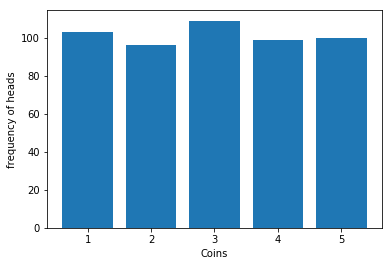

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [flip_sum(200),flip_sum(200),flip_sum(200),flip_sum(200),flip_sum(200)]


plt.bar(range(1,6), x)
plt.ylabel('frequency of heads')
plt.xlabel('Coins')
plt.show()

## 6.1.4
Write a function, estimate_prob, that uses flip_sum to estimate the following probability:

$P(  k_1 <= $ number of heads in $n$ flips $< k_2 ) $

The function should estimate the probability by running $m$ different trials of flip_sum(n), probably using a for loop.

In order to receive full credit estimate_prob call flip_sum (aka: flip_sum is located inside the estimate_prob function)

In [6]:
def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    i = 0
    success = 0
    while i<m:
        h = float(flip_sum(n))
        if (h >= k1 and h<k2):
            success = success +1
        i+=1
    return float(success)/float(m)    


In [7]:
# this is a small sanity check

x = estimate_prob(100,45,55,1000)
print x
#assert 'float' in str(type(x))
#print "does x==0.687?"

0.686


## 6.2.2  Calculate the actual probablities and compare it to your estimates for:
n= number of coins
k1 = min number of heads
k2 = upper limit of number of heads
m = the number of experiments
### 6.2.2.a n=100, k1 = 40, k2=60 m=100


In [11]:
x = estimate_prob(100, 40, 60, 100)

def actual_prob(n, m):
    trial = 0
    heads = 0.0
    while trial < m:
        heads += float(flip_sum(n))
        trial += 1
    return heads/float(m*n)

y = actual_prob(100, 100)

print "Estimated :", x
print "Actual : ", y

Estimate : 0.93
Actual :  0.4927


### 6.2.2.b n=100, k1 = 40, k2=60 m=1000

In [13]:
x = estimate_prob(100, 40, 60, 1000)
y = actual_prob(100, 1000)
print "Estimate :", x
print "Actual : ", y

Estimate : 0.945
Actual :  0.50346


# 6.3 Conditional probablity

In a recent study, the following data were obtained in response to the question"
    "Do you favor the proposal of the school’s combining the elementary and middle school students in one building?"
    
Answers = [Yes, No, No opinion]
Males = [75, 89, 10]
Females = [105, 56, 6]

If a person is selected at random, find these probabilities solving using python.
1. The person has no opinion
2. The person is a male or is against the issue.
3. The person is a female, given that the person opposes the issue.

In [15]:
def cross(A, B):
    """The set of ways of concatenating one item from collection A with one from B."""
    return {a + b 
            for a in A for b in B}
def prob(e, s):
    return float(e)/float(s)

def bayes(A, B, BgivenA):
    AgivenB = (A * BgivenA)/B
    return AgivenB

possible_events = cross('M', '123') | cross('F','123')  #Using 1 to represent Opion YES, 2 for NO and 3 for No Opinion


F1 = 105
F2 = 56
F3 = 6
M1 = 75
M2 = 89
M3 = 10
Total = F1 +F2 +F3 + M1 + M2 +M3

print "Probability that the person has no opinion: ", prob(M3+F3, Total)

print "Probability that the person is a male or is against the issue.", prob(M1 + M2 + M3, Total) + prob (F2, Total)

pF = float(F1+F2+F3)/float(Total)
p2 = float(M2+F2)/float(Total)
p2F = float(F2)/float(Total)
print "Probability that the person is a female, given that the person opposes the issue." , bayes(pF,p2, p2F)
    

Probability that the person has no opinion:  0.0469208211144
Probability that the person is a male or is against the issue. 0.674486803519
Probability that the person is a female, given that the person opposes the issue. 0.189139447871


## 6.4 Matrix creation
Write a 12 by 12 times table matrix shown below.
Do this
6.4.1 using nested for loops
6.4.2 using numpy fromfunction array constructor
6.4.3 using numpy broadcasting

In [16]:
from numpy import array
import numpy as np

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
   [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
   [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
   [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
   [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
   [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
   [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
   [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
   [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
   [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
   [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
   [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

#### 6.4.1 Using For Loop

In [17]:
array( [ [ (i+1)*(j+1) for j in xrange(12)] for i in xrange(12)] )

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

#### 6.4.2 Using fromfunction

In [18]:
np.fromfunction(lambda i, j: np.int32((i+1)*(j+1)), (12,12))

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

#### 6.4.3 Using Numpy Broadcasting

In [20]:
a = np.indices((12,12))
b = (a[0]+1) * (a[1]+1)
b

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

## 6.5 
Answer the following questions with respect to the
https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu
    
    
How many patients were censored?
What is the correlation coefficient between state and Suicide for deaths above 100 ?
What is the average deaths for each state and type of cause ?
What is the year that was the most deadly for each cause name ?

In [9]:
import pandas as pd
dfh = pd.read_csv(".\data\NCHS_-_Leading_Causes_of_Death__United_States.csv")
dfh.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


#### How many patients were censored?

In [11]:
censored_patients = sum(dfh['Deaths'])
print "The number of censored_patients = ", censored_patients

The number of censored_patients =  157803463


#### What is the correlation coefficient between state and Suicide for deaths above 100 ?

In [43]:
dfhsuicides = dfh.loc[dfh['Cause Name']=='Suicide']
dfhsuicides100 = dfhsuicides.loc[dfhsuicides['Deaths']>100]
dfhsuicides100.head()


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
8475,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,788,15.7
8476,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,750,14.9
8477,2014,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,715,14.5
8478,2013,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,721,14.4
8479,2012,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,724,14.7


In [45]:
g = dfh.groupby(['State','Year']).Deaths.sum()
g1 = pd.Series.to_frame(g)
g1.head()

Deaths
State   Year        
Alabama 1999   80246
        2000   80484
        2001   80775
        2002   82160
        2003   82741

#### What is the average deaths for each state and type of cause ?

In [76]:
dfh.groupby(['State','Cause Name']).Deaths.mean()

State          Cause Name             
Alabama        All causes                 47823.833333
               Alzheimer's disease         1479.833333
               CLRD                        2654.333333
               Cancer                     10043.333333
               Diabetes                    1341.277778
               Heart disease              12635.166667
               Influenza and pneumonia     1028.666667
               Kidney disease              1049.944444
               Stroke                      2861.500000
               Suicide                      624.500000
               Unintentional injuries      2398.222222
Alaska         All causes                  3521.000000
               Alzheimer's disease           66.888889
               CLRD                         171.833333
               Cancer                       835.111111
               Diabetes                      99.444444
               Heart disease                672.611111
               Influenza a

####  What is the year that was the most deadly for each cause name ?

In [158]:
maxdeath_years = dfh.sort_values('Deaths', ascending=False).drop_duplicates(['Cause Name'])
maxdeath_years[['Cause Name','Year','Deaths']]

,Cause Name,Year,Deaths
844,All causes,2015,2712630
5542,Heart disease,1999,725192
2715,Cancer,2016,598038
8347,Stroke,2000,167661
10159,Unintentional injuries,2016,161374
3652,CLRD,2015,155041
1779,Alzheimer's disease,2016,116103
4587,Diabetes,2016,80058
6473,Influenza and pneumonia,2002,65681
7402,Kidney disease,2010,50476


# Investigate plotting, linearegression, or complex matrix manipulation to get a score of 4 or cover two additional investigations for a score of 5.

## Linear Regression

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://www.geeksforgeeks.org/linear-regression-python-implementation/

('Coefficients: \n', array([938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


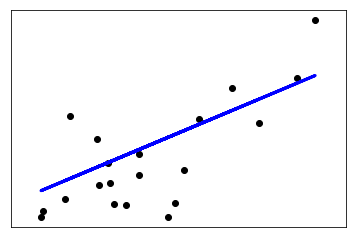

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Estimated coefficients:
b_0 = -0.0586206896552 \ 
b_1 = 1.45747126437


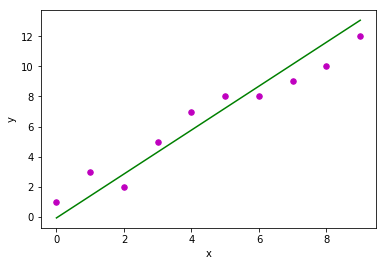

In [164]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x - n*m_y*m_x) 
    SS_xx = np.sum(x*x - n*m_x*m_x) 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
    marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # function to show plot 
    plt.show() 

def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 
